In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# path of data 
path = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'
df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [3]:
from sklearn.linear_model import LinearRegression

In [4]:
lm=LinearRegression()
lm

LinearRegression()

In [5]:
X=df[['highway-mpg']]
Y=df[['price']]

In [6]:
lm.fit(X,Y)

LinearRegression()

In [7]:
Yhat=lm.predict(X)
Yhat[0:5]

array([[16236.50464347],
       [16236.50464347],
       [17058.23802179],
       [13771.3045085 ],
       [20345.17153508]])

In [8]:
#intercept
lm.intercept_

array([38423.30585816])

In [9]:
#slope
lm.coef_

array([[-821.73337832]])

In [10]:
#equation
Yhat=38423.31-821.73*X


In [11]:
#multiple linear regression
#predictors
Z=df[['engine-size','horsepower','curb-weight','highway-mpg']]

In [12]:
#fit the price(y)in the predictors
lm.fit(Z,df[['price']])

LinearRegression()

In [13]:
#intercept again
lm.intercept_

array([-15806.62462633])

In [14]:
lm.coef_

array([[81.53026382, 53.49574423,  4.70770099, 36.05748882]])

<b>Price</b>=-15806.62+(81.53 * <b>engine-size</b>)+(53.50* <b>horsepower</b>)+(4.71* <b>curb-weight</b>)+(36.06* <b>highway-mpg</b>)


In [15]:
#Visualization using Seaborn and %matplotlib inline
import seaborn as sns
%matplotlib inline

(0.0, 48171.544998578975)

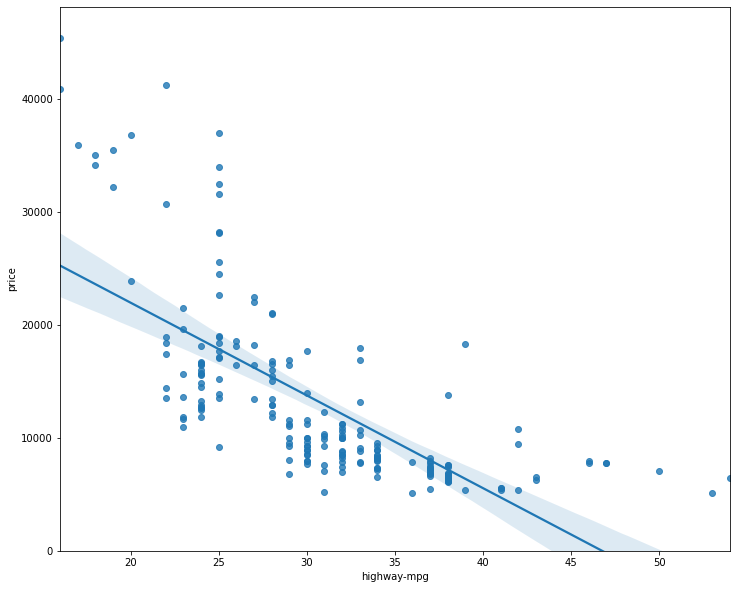

In [16]:
width=12
height=10
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

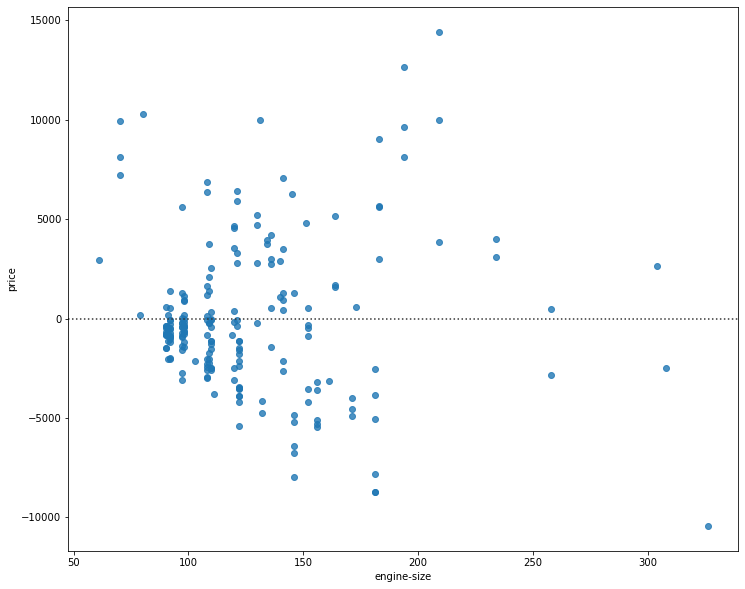

In [17]:
#residual plot, residuals = the diff between the observed value and the predicted value, if it is scattered or spread evenly around the X axis, we use linear model, else, not
plt.figure(figsize=(width,height))
sns.residplot(x="engine-size",y="price",data=df)
plt.show()

In [18]:
#correlation
df[["engine-size","price"]].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


In [19]:
#multiple linear regression plot
Y_hat=lm.predict(Z)

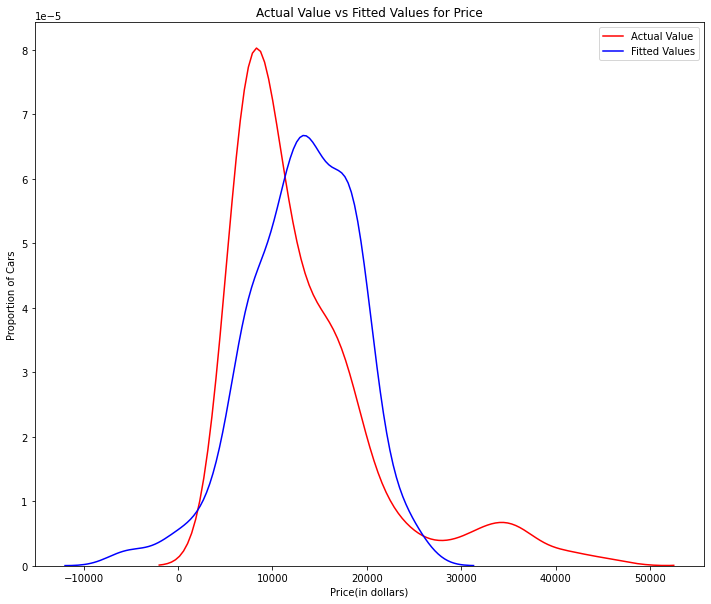

In [20]:
plt.figure(figsize=(width,height))

ax1=sns.distplot(df['price'], hist=False,color="r", label="Actual Value")
sns.distplot(Yhat, hist=False, color="b", label="Fitted Values", ax=ax1)

plt.title('Actual Value vs Fitted Values for Price')
plt.xlabel('Price(in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

In [21]:
a=min(df['price'])
b=max(df['engine-size'])

print (a)
print(b)


5118.0
326


In [22]:
import statistics 
c=statistics.mean(df['price'])
print(c)

13207.129353233831


In [23]:
#function to plot the data for Polynomial Regression(non-linear)
def PlotPolly(model,independent_variable,dependent_variable, Name):
    x_new=np.linspace(15,55,100)
    y_new=model(x_new)
    
    plt.plot(independent_variable,dependent_variable,'.',x_new, y_new,'-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax=plt.gca()
    ax.set_facecolor((0.898,0.898,0.898))
    fig=plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')
    
    plt.show()
    plt.close()
            

In [24]:
#variables
x=df['highway-mpg']
y=df['price']

In [25]:
#polynomial to the 3rd order(cubic)
f = np.polyfit(x,y,3)
p=np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


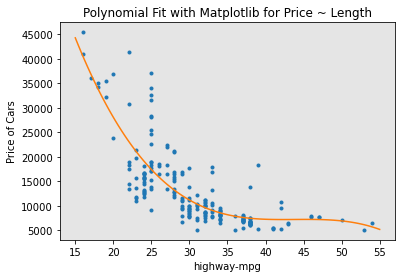

In [26]:
PlotPolly(p, x, y,'highway-mpg')

In [27]:
np.polyfit(x,y,3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


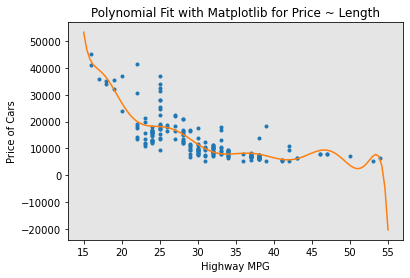

In [28]:
#polynomial to the 11th order(cubic)
f1 = np.polyfit(x, y, 11)
p1 = np.poly1d(f1)
print(p)
PlotPolly(p1,x,y, 'Highway MPG')

In [29]:
#multivariate polynomial function
from sklearn.preprocessing import PolynomialFeatures

In [30]:
#polynomialfeatures object of degree2 
pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

In [31]:
Z_pr=pr.fit_transform(Z)
Z.shape

(201, 4)

In [32]:
#transformation from 4 features to 15 with 201 samples
Z_pr.shape

(201, 15)

In [33]:
#Pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]
                                   

In [34]:
pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [35]:
# normalize the data, perform a transform and fit the model simultaneously
pipe.fit(Z,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [66]:
# normalize the data, perform a transform and produce a prediction simultaneously
ypipe=pipe.predict(Z)
ypipe[0:4]


array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015])

In [37]:
# a pipeline that Standardizes the data, then perform prediction using a linear regression model using the features Z and targets y
Input=[('scale',StandardScaler()),('model',LinearRegression())]

pipe=Pipeline(Input)

pipe.fit(Z,y)

ypipe=pipe.predict(Z)
ypipe[0:10]

array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015,
       15521.31420211, 13869.66673213, 15456.16196732, 15974.00907672,
       17612.35917161, 10722.32509097])

In [38]:
#Simple Linear Regression
# R squared R^2 Highway-mpg
lm.fit(X,Y)
print('The R^2 is:', lm.score(X,Y))

The R^2 is: 0.4965911884339175


In [39]:
# Mean Squared Error
Yhat=lm.predict(X)
print('The output of the first four predicted value is:',Yhat[0:4])

The output of the first four predicted value is: [[16236.50464347]
 [16236.50464347]
 [17058.23802179]
 [13771.3045085 ]]


In [40]:
#import MSE function
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(df['price'],Yhat)
print('The MSE of price and predicted value is',mse)

The MSE of price and predicted value is 31635042.944639895


In [42]:
#Multiple Linear Regression
#calculate R^2
#fit the model
lm.fit(Z,df['price'])
#Find the R^2
print ('R squared is:', lm.score(Z, df['price']))

R squared is: 0.8093562806577457


In [45]:
Y_predict_multifit=lm.predict(Z)
print ('The mean squared error of price the predicted value is', mean_squared_error(df['price'], Y_predict_multifit))

The mean squared error of price the predicted value is 11980366.87072649


In [46]:
# Polynomial fit
from sklearn.metrics import r2_score

In [53]:
#find R^2
r_squared=r2_score(y,p(x))
print('the R^2 value is',r_squared)

the R^2 value is 0.6741946663906513


In [55]:
# find MSE
mean_squared_error(df['price'],p(x))

20474146.42636125

In [56]:
#Prediction and Decision-making
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [57]:
# create a new input

new_input=np.arange(1,100,1).reshape(-1,1)

In [58]:
lm.fit(X,Y)
lm

LinearRegression()

In [59]:
#Produce a prediction

yhat=lm.predict(new_input)
yhat[0:5]

array([[37601.57247984],
       [36779.83910151],
       [35958.10572319],
       [35136.37234487],
       [34314.63896655]])

<function matplotlib.pyplot.show(*args, **kw)>

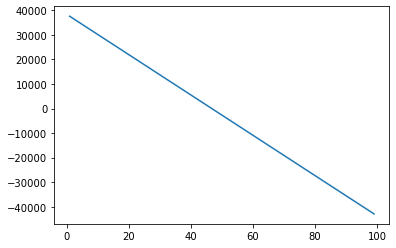

In [61]:
#we can plot the data
plt.plot(new_input, yhat)
plt.show

In [ ]:
#Because Multiple Regression has higher R^2 value and the lowest MSE, it is by far the best model compared to the simple regression model and polynomial model